In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import csv

import contractions
import nltk
from nltk.text import Text
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


import re 

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv('sg_phases.csv')

In [3]:
df

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
0,https://twitter.com/_rodahidup/status/14658121...,2021-11-30 22:37:02+00:00,suspected omicron case taken ncid home recover...,suspected omicron case taken ncid home recover...,1465812140439203842,https://twitter.com/_rodahidup,0,0,0,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,SummaryCard(title='Suspected Omicron Covid-19 ...,NaN,NaN
1,https://twitter.com/_rodahidup/status/14657109...,2021-11-30 15:54:52+00:00,singapore report new case death icu utilisatio...,singapore report new case death icu utilisatio...,1465710933246820367,https://twitter.com/_rodahidup,0,0,0,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,"SummaryCard(title='Singapore reports 1,239 new...",NaN,NaN
2,https://twitter.com/temptempholder/status/1465...,2021-11-30 15:48:16+00:00,scapegoat century raeesah khan directed opaque...,scapegoat century raeesah khan directed opaque...,1465709269370556419,https://twitter.com/temptempholder,0,1,3,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,NaN,NaN
3,https://twitter.com/temptempholder/status/1465...,2021-11-30 12:43:53+00:00,math person think ability pull student rally s...,math person think ability pull student rally s...,1465662868578136074,https://twitter.com/temptempholder,0,0,0,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.817832999913, latitu...","Place(id='5f1f473ed6455f55', fullName='North-E...",NaN,NaN,NaN,NaN,NaN
4,https://twitter.com/temptempholder/status/1465...,2021-11-30 12:24:35+00:00,covid sept terrorist attack happening time,covid sept terrorist attack happening time,1465658013058928649,https://twitter.com/temptempholder,0,0,0,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.817832999913, latitu...","Place(id='5f1f473ed6455f55', fullName='North-E...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4902,https://twitter.com/SajidTweetsBD/status/12717...,2020-06-13 08:40:28+00:00,breaking coronavirus update bangladesh last ho...,breaking coronavirus update bangladesh last ho...,1271724105264361472,https://twitter.com/SajidTweetsBD,0,0,0,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.696411999967, latitu...","Place(id='14d9532bd696d8cb', fullName='North R...",NaN,NaN,NaN,NaN,NaN
4903,https://twitter.com/Rys5a_Gonzalez/status/1271...,2020-06-11 17:20:37+00:00,thankfully dad got discharged today thou reall...,thankfully dad got discharged today thou reall...,1271130229835132929,https://twitter.com/Rys5a_Gonzalez,0,0,0,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.696411999967, latitu...","Place(id='14d9532bd696d8cb', fullName='North R...",NaN,NaN,NaN,NaN,NaN
4904,https://twitter.com/msmsaifullah/status/127060...,2020-06-10 06:43:05+00:00,raneunn ah explains present dispensation tn wa...,raneunn ah explains present dispensation tn wa...,1270607400194592773,https://twitter.com/msmsaifullah,1,0,0,0,...,1.270607e+18,https://twitter.com/RangaEunny,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,NaN,NaN
4905,https://twitter.com/whywendywrites/status/1267...,2020-06-01 12:37:15+00:00,snapshot circuit breaker singapore world becom...,snapshot circuit breaker singapore world becom...,1267435038465024001,https://twitter.com/whywendywrites,0,0,0,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.8627359, latitude=1....","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,NaN,NaN


In [4]:
df.isna().sum()

url                    0
date                   0
rawContent             4
renderedContent        4
id                     0
user                   0
replyCount             0
retweetCount           0
likeCount              0
quoteCount             0
conversationId         0
lang                   0
source                 0
sourceUrl              0
sourceLabel            0
links               3179
media               4108
retweetedTweet      4907
quotedTweet         4400
inReplyToTweetId    3955
inReplyToUser       3955
mentionedUsers      3667
coordinates            1
place                  1
hashtags            3901
cashtags            4906
card                3930
viewCount           4907
vibe                4907
dtype: int64

In [5]:
df['rawContent'].fillna('', inplace=True)
df['renderedContent'].fillna('', inplace=True)

In [6]:
## remove specific word HTTP
df['rawContent'] = df['rawContent'].str.replace('covid', '')
df['rawContent'] = df['rawContent'].str.replace('coronavirus', '')

df['renderedContent'] = df['renderedContent'].str.replace('covid', '')
df['renderedContent'] = df['renderedContent'].str.replace('coronavirus', '')

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 10)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

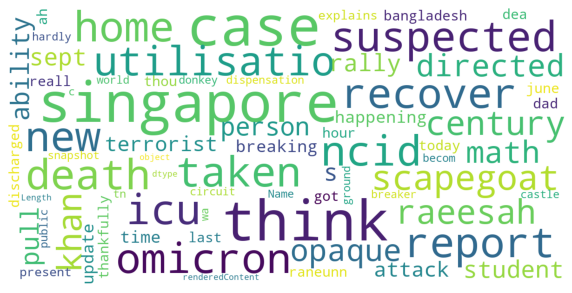

In [8]:
show_wordcloud(df["renderedContent"])

In [9]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [10]:
data = df['renderedContent'].values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['suspected', 'omicron', 'case', 'taken', 'ncid', 'home', 'recovery', 'allowed']


## Building Bi-gram and Tri-gram Models

In [11]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [12]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [13]:
data_words_bigrams = make_bigrams(data_words)
data_words_bigrams

[['suspected',
  'omicron',
  'case',
  'taken',
  'ncid',
  'home',
  'recovery',
  'allowed'],
 ['singapore',
  'report',
  'new',
  'case',
  'death',
  'icu',
  'utilisation',
  'rate',
  'rise'],
 ['scapegoat',
  'century',
  'raeesah',
  'khan',
  'directed',
  'opaque',
  'political',
  'party',
  'world',
  'worker',
  'party',
  'lied',
  'time',
  'end',
  'pressured',
  'pap',
  'investigation',
  'pap',
  'resource',
  'could',
  'better',
  'use',
  'crisis',
  'give',
  'thunderous',
  'applause',
  'pls'],
 ['math',
  'person',
  'think',
  'ability',
  'pull',
  'student',
  'rally',
  'student',
  'math',
  'primary',
  'secondary',
  'unite',
  'present',
  'coherent',
  'mathematical',
  'view',
  'along',
  'side',
  'govt',
  'explanation',
  'able',
  'put',
  'together',
  'newsletter'],
 ['sept', 'terrorist', 'attack', 'happening', 'time'],
 ['vishnundtv',
  'thanks',
  'reporting',
  'including',
  'video',
  'airport',
  'day',
  'unfortunately',
  'troubling'

In [14]:
data_words_trigrams = make_trigrams(data_words)
data_words_trigrams

[['suspected',
  'omicron',
  'case',
  'taken',
  'ncid',
  'home',
  'recovery',
  'allowed'],
 ['singapore',
  'report',
  'new',
  'case',
  'death',
  'icu',
  'utilisation',
  'rate',
  'rise'],
 ['scapegoat',
  'century',
  'raeesah',
  'khan',
  'directed',
  'opaque',
  'political',
  'party',
  'world',
  'worker',
  'party',
  'lied',
  'time',
  'end',
  'pressured',
  'pap',
  'investigation',
  'pap',
  'resource',
  'could',
  'better',
  'use',
  'crisis',
  'give',
  'thunderous',
  'applause',
  'pls'],
 ['math',
  'person',
  'think',
  'ability',
  'pull',
  'student',
  'rally',
  'student',
  'math',
  'primary',
  'secondary',
  'unite',
  'present',
  'coherent',
  'mathematical',
  'view',
  'along',
  'side',
  'govt',
  'explanation',
  'able',
  'put',
  'together',
  'newsletter'],
 ['sept', 'terrorist', 'attack', 'happening', 'time'],
 ['vishnundtv',
  'thanks',
  'reporting',
  'including',
  'video',
  'airport',
  'day',
  'unfortunately',
  'troubling'

## Building rough LDA model 

In [15]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words_trigrams)

# Create Corpus
texts = data_words_trigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]


In [16]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=5, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [17]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.008*"people" + 0.008*"like" + 0.006*"world" + 0.006*"singapore" + '
  '0.005*"go" + 0.005*"want" + 0.005*"time" + 0.005*"country" + 0.005*"case" + '
  '0.004*"see"'),
 (1,
  '0.025*"singapore" + 0.019*"case" + 0.015*"new" + 0.011*"vaccine" + '
  '0.010*"death" + 0.008*"people" + 0.007*"get" + 0.007*"day" + 0.006*"year" + '
  '0.006*"first"'),
 (2,
  '0.007*"vaccine" + 0.006*"think" + 0.006*"singapore" + 0.005*"like" + '
  '0.005*"india" + 0.004*"help" + 0.004*"govt" + 0.004*"got" + 0.003*"hope" + '
  '0.003*"need"'),
 (3,
  '0.009*"people" + 0.007*"year" + 0.007*"vaccine" + 0.006*"amp" + '
  '0.006*"time" + 0.006*"really" + 0.005*"still" + 0.005*"get" + '
  '0.005*"singapore" + 0.005*"mask"'),
 (4,
  '0.019*"singapore" + 0.008*"case" + 0.005*"test" + 0.005*"time" + '
  '0.005*"amp" + 0.004*"news" + 0.004*"china" + 0.004*"day" + 0.004*"pandemic" '
  '+ 0.004*"first"')]


In [18]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, 
                                     coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.3263395072231238


## Tuning based on number of topics

In [19]:
# supporting function
def compute_coherence_values(corpus, dictionary, k):
       
    # Build LDA model
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           per_word_topics=True)
    
    # Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, 
                                         coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [20]:
# Can take a long time to run. In this case we are going to k_max=14.
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

coherence_scores = []
model_topics = []

for k in range(2, 20):
    cv = compute_coherence_values(corpus=corpus, dictionary=id2word,k=k) 
    model_topics.append(k)    
    coherence_scores.append(cv)    
    print("#Topics: " + str(k) + ", Score: " + str(coherence_scores[-1]))

print(datetime.datetime.now())

2023-03-15 14:50:33.906835
#Topics: 2, Score: 0.326618149811002
#Topics: 3, Score: 0.3179641824196811
#Topics: 4, Score: 0.33059791154218965
#Topics: 5, Score: 0.3254003722911688
#Topics: 6, Score: 0.3171808713134107
#Topics: 7, Score: 0.31857096495958664
#Topics: 8, Score: 0.2833750576503359
#Topics: 9, Score: 0.31508751352661934
#Topics: 10, Score: 0.2989377439076089
#Topics: 11, Score: 0.3767868219655744
#Topics: 12, Score: 0.3318287048028982
#Topics: 13, Score: 0.3279400212516604
#Topics: 14, Score: 0.3356405284915911
#Topics: 15, Score: 0.3228573205614225
#Topics: 16, Score: 0.3058080500502257
#Topics: 17, Score: 0.37125148544659964
#Topics: 18, Score: 0.3406898617060556
#Topics: 19, Score: 0.345857730665799
2023-03-15 14:54:09.435282


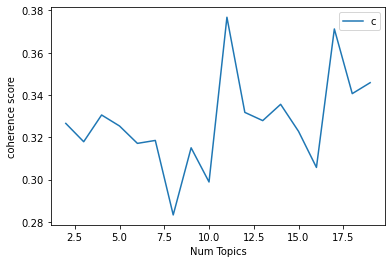

In [21]:
# Show graph

import matplotlib.pyplot as plt

limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_scores)
plt.xlabel("Num Topics")
plt.ylabel("coherence score")
plt.legend(("coherence score"), loc='best')
plt.show()

In [22]:
end here

SyntaxError: invalid syntax (<ipython-input-22-9bcc9ab561c7>, line 1)

### Final Model

In [23]:
num_topics = 11

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10)

In [37]:
# Save the LDA model

from gensim.test.utils import datapath

lda_model_saved_file = datapath("sg_phases_lda_model_11")
lda_model.save(lda_model_saved_file)

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
score = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, coherence='c_v')
score.get_coherence()

0.3367375941268262

In [25]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./lda_model/sg_phases_lda_vis_tuned_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './lda_vis/sg_phases_lda_vis_tuned_'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.083890  0.118952       1        1  17.434793
1     -0.120405 -0.080601       2        1  12.020587
7     -0.103532  0.041646       3        1  11.105304
8     -0.031055 -0.017159       4        1   9.126765
3     -0.030677  0.075773       5        1   8.736687
10     0.149273  0.121398       6        1   8.494240
9     -0.001208  0.008796       7        1   8.410196
2     -0.046767 -0.032695       8        1   6.825031
6      0.163126 -0.002184       9        1   6.762300
4      0.047195 -0.060261      10        1   5.768825
5      0.057939 -0.173665      11        1   5.315273, topic_info=          Term        Freq       Total Category  logprob  loglift
1         case  476.000000  476.000000  Default  30.0000  30.0000
10         new  323.000000  323.000000  Default  29.0000  29.0000
14   singapore  806.000000  806.000000  Default  28.0000  28.0000
75       india  163.000000  163.000000  Default  27.0000  27.0000
8        death  204.000000  204.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
868       even   12.910385  156.892606  Topic11  -5.5354   0.4371
154    country   12.362528  175.244788  Topic11  -5.5787   0.2831
324       make   11.411501  118.355693  Topic11  -5.6588   0.5955
411    vaccine   11.831759  407.743223  Topic11  -5.6226  -0.6053
272        get    9.866227  265.037602  Topic11  -5.8043  -0.3562

[784 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
5587      9  0.953622  abrahamrosenor
1800      1  0.840858             abt
1800      8  0.064681             abt
3912      4  0.858628        accident
930       1  0.085079         account
...     ...       ...             ...
186      11  0.007789            year
1175      4  0.289342             yes
1175      6  0.607619             yes
1175      9  0.115737             yes
1611      7  0.893528            york

[1810 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 8, 9, 4, 11, 10, 3, 7, 5, 6])

### Add Sentiment Analysis

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
def determine_sentiment(score):
    if score < 0:
        return "Negative"
    elif score > 0:
        return "Positive"
    else:
        return "Neutral"

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
sentiment_scores = df['rawContent'].apply(sid.polarity_scores)
sentiment_scores

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       {'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'comp...
1       {'neg': 0.328, 'neu': 0.672, 'pos': 0.0, 'comp...
2       {'neg': 0.271, 'neu': 0.432, 'pos': 0.297, 'co...
3       {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...
4       {'neg': 0.722, 'neu': 0.278, 'pos': 0.0, 'comp...
                              ...                        
4902    {'neg': 0.415, 'neu': 0.585, 'pos': 0.0, 'comp...
4903    {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...
4904    {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...
4905    {'neg': 0.114, 'neu': 0.886, 'pos': 0.0, 'comp...
4906    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: rawContent, Length: 4907, dtype: object

In [38]:
# Load the saved model

from gensim.test.utils import datapath
lda_model_saved_file = datapath("sg_phases_lda_model_11")
lda_model = gensim.models.ldamodel.LdaModel.load(lda_model_saved_file)

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
topics, num_topics = [], 11

for i in range(len(corpus)):
    top_topics = (
        lda_model.get_document_topics(corpus[i],
                                      minimum_probability=0.0))
    topic_vec = [top_topics[i][1] for i in range(num_topics)]
    topics.append(topic_vec.index(max(topic_vec))+1)
    
topics

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[10,
 2,
 9,
 9,
 4,
 9,
 5,
 1,
 1,
 5,
 1,
 1,
 2,
 7,
 1,
 1,
 11,
 3,
 10,
 5,
 2,
 1,
 6,
 2,
 9,
 3,
 8,
 1,
 1,
 11,
 9,
 3,
 7,
 8,
 6,
 2,
 8,
 8,
 4,
 4,
 8,
 8,
 6,
 1,
 4,
 7,
 2,
 6,
 2,
 8,
 2,
 1,
 4,
 2,
 11,
 4,
 8,
 8,
 3,
 8,
 4,
 5,
 1,
 8,
 1,
 3,
 5,
 4,
 3,
 2,
 8,
 5,
 5,
 8,
 2,
 1,
 5,
 5,
 5,
 11,
 5,
 2,
 5,
 10,
 7,
 2,
 8,
 1,
 7,
 10,
 10,
 5,
 10,
 1,
 4,
 4,
 4,
 2,
 6,
 11,
 8,
 6,
 10,
 4,
 9,
 9,
 2,
 11,
 4,
 5,
 4,
 9,
 1,
 2,
 2,
 8,
 2,
 1,
 1,
 6,
 3,
 11,
 1,
 5,
 2,
 9,
 8,
 2,
 9,
 8,
 6,
 2,
 8,
 8,
 11,
 4,
 3,
 11,
 2,
 9,
 6,
 5,
 9,
 2,
 8,
 4,
 9,
 10,
 2,
 2,
 3,
 3,
 2,
 11,
 10,
 9,
 11,
 2,
 1,
 5,
 2,
 2,
 2,
 10,
 10,
 7,
 2,
 4,
 2,
 11,
 8,
 10,
 11,
 2,
 11,
 1,
 9,
 2,
 4,
 7,
 3,
 1,
 4,
 4,
 5,
 4,
 8,
 1,
 4,
 3,
 1,
 10,
 9,
 1,
 11,
 2,
 2,
 11,
 2,
 8,
 2,
 8,
 10,
 7,
 2,
 5,
 7,
 3,
 9,
 11,
 4,
 2,
 3,
 8,
 9,
 1,
 10,
 8,
 10,
 6,
 1,
 2,
 11,
 2,
 3,
 2,
 8,
 2,
 2,
 10,
 11,
 2,
 2,
 9,
 11,
 2,
 1,
 4,
 2,
 2,
 11

In [40]:
df["Topic"] = topics
df.head()

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,Topic
0,https://twitter.com/_rodahidup/status/14658121...,2021-11-30 22:37:02+00:00,suspected omicron case taken ncid home recover...,suspected omicron case taken ncid home recover...,1465812140439203842,https://twitter.com/_rodahidup,0,0,0,0,...,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,SummaryCard(title='Suspected Omicron Covid-19 ...,NaN,NaN,10
1,https://twitter.com/_rodahidup/status/14657109...,2021-11-30 15:54:52+00:00,singapore report new case death icu utilisatio...,singapore report new case death icu utilisatio...,1465710933246820367,https://twitter.com/_rodahidup,0,0,0,0,...,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,"SummaryCard(title='Singapore reports 1,239 new...",NaN,NaN,2
2,https://twitter.com/temptempholder/status/1465...,2021-11-30 15:48:16+00:00,scapegoat century raeesah khan directed opaque...,scapegoat century raeesah khan directed opaque...,1465709269370556419,https://twitter.com/temptempholder,0,1,3,0,...,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,NaN,NaN,9
3,https://twitter.com/temptempholder/status/1465...,2021-11-30 12:43:53+00:00,math person think ability pull student rally s...,math person think ability pull student rally s...,1465662868578136074,https://twitter.com/temptempholder,0,0,0,0,...,NaN,NaN,"Coordinates(longitude=103.817832999913, latitu...","Place(id='5f1f473ed6455f55', fullName='North-E...",NaN,NaN,NaN,NaN,NaN,9
4,https://twitter.com/temptempholder/status/1465...,2021-11-30 12:24:35+00:00,sept terrorist attack happening time,sept terrorist attack happening time,1465658013058928649,https://twitter.com/temptempholder,0,0,0,0,...,NaN,NaN,"Coordinates(longitude=103.817832999913, latitu...","Place(id='5f1f473ed6455f55', fullName='North-E...",NaN,NaN,NaN,NaN,NaN,4


In [41]:
sentiments = sentiment_scores.apply(lambda x: x["compound"])
sentiment_label = sentiments.apply(determine_sentiment)
df["Sentiment"] = sentiment_label
df.head()

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,Topic,Sentiment
0,https://twitter.com/_rodahidup/status/14658121...,2021-11-30 22:37:02+00:00,suspected omicron case taken ncid home recover...,suspected omicron case taken ncid home recover...,1465812140439203842,https://twitter.com/_rodahidup,0,0,0,0,...,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,SummaryCard(title='Suspected Omicron Covid-19 ...,NaN,NaN,10,Negative
1,https://twitter.com/_rodahidup/status/14657109...,2021-11-30 15:54:52+00:00,singapore report new case death icu utilisatio...,singapore report new case death icu utilisatio...,1465710933246820367,https://twitter.com/_rodahidup,0,0,0,0,...,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,"SummaryCard(title='Singapore reports 1,239 new...",NaN,NaN,2,Negative
2,https://twitter.com/temptempholder/status/1465...,2021-11-30 15:48:16+00:00,scapegoat century raeesah khan directed opaque...,scapegoat century raeesah khan directed opaque...,1465709269370556419,https://twitter.com/temptempholder,0,1,3,0,...,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,NaN,NaN,9,Positive
3,https://twitter.com/temptempholder/status/1465...,2021-11-30 12:43:53+00:00,math person think ability pull student rally s...,math person think ability pull student rally s...,1465662868578136074,https://twitter.com/temptempholder,0,0,0,0,...,NaN,"Coordinates(longitude=103.817832999913, latitu...","Place(id='5f1f473ed6455f55', fullName='North-E...",NaN,NaN,NaN,NaN,NaN,9,Positive
4,https://twitter.com/temptempholder/status/1465...,2021-11-30 12:24:35+00:00,sept terrorist attack happening time,sept terrorist attack happening time,1465658013058928649,https://twitter.com/temptempholder,0,0,0,0,...,NaN,"Coordinates(longitude=103.817832999913, latitu...","Place(id='5f1f473ed6455f55', fullName='North-E...",NaN,NaN,NaN,NaN,NaN,4,Negative


/Users/jon/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


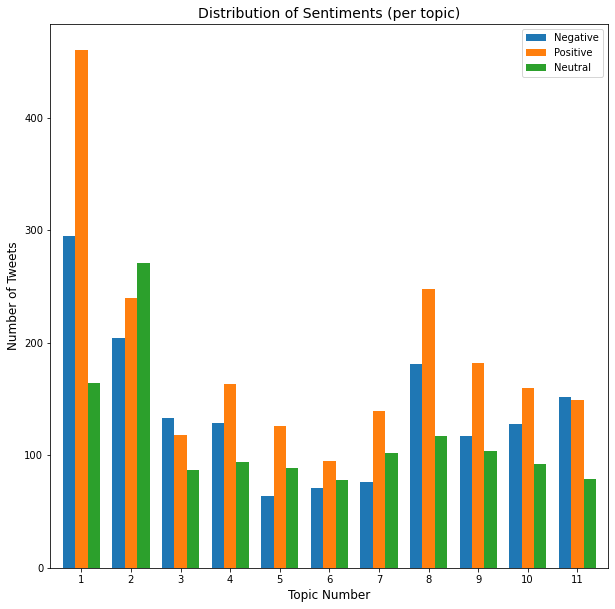

In [42]:
import matplotlib.pyplot as plt

topics = range(1, num_topics+1)
columns = ["Negative", "Positive", "Neutral"]
data = []

for i in range(num_topics):
    curr_topic = df[df["Topic"] == i+1]
    negative, positive, neutral = len(curr_topic[curr_topic["Sentiment"] == "Negative"]), len(curr_topic[curr_topic["Sentiment"] == "Positive"]), len(curr_topic[curr_topic["Sentiment"] == "Neutral"]) 
    data.append([negative, positive, neutral])

topic_sentiment_df = pd.DataFrame(data, columns=columns, index=topics)
topic_sentiment_df.plot(kind="bar", figsize=(10, 10), width=0.75)
plt.title("Distribution of Sentiments (per topic)", fontsize=14)
plt.xlabel("Topic Number", fontsize=12)
plt.ylabel("Number of Tweets", fontsize=12)
plt.gca().xaxis.set_tick_params(rotation=0)
plt.show()